In [1]:
import torch
from model import UNet
from utils import PolygonDataset, color_vocab
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [2]:
model = UNet()
model.load_state_dict(torch.load("unet_model.pth", map_location='cpu'))
model.eval()

UNet(
  (embedding): Embedding(20, 32)
  (inc): Sequential(
    (0): Conv2d(35, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (down1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (down2): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (up1_upsample): C

In [4]:
# Test inference
test_dataset = PolygonDataset("dataset/validation/data.json", "dataset/validation/inputs", "dataset/validation/outputs")
img, true_out, color = test_dataset[0]
with torch.no_grad():
    pred = model(img.unsqueeze(0), torch.tensor([color]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4241638..1.2512151].


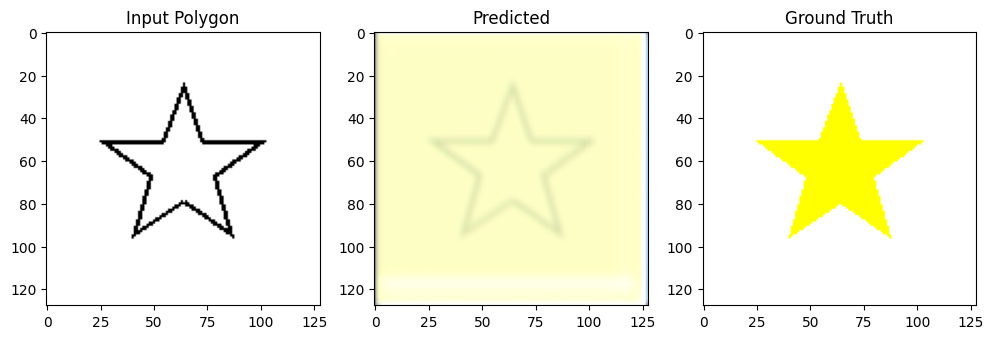

In [5]:
# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Input Polygon")
plt.imshow(img.permute(1, 2, 0))
plt.subplot(1, 3, 2)
plt.title("Predicted")
plt.imshow(pred.squeeze().permute(1, 2, 0))
plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(true_out.permute(1, 2, 0))
plt.show()